In [73]:
import matplotlib as plt
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
plt.style.use('seaborn')
import pandas as pd
# Load birth data using read_csv
from pandas import read_csv
df = read_csv('municipality_bus_utilization.csv', header=0, parse_dates=[0], squeeze=True)
df['percentage_usage'] = df.apply (lambda row: row["usage"] / row["total_capacity"], axis = 1)
# print(type(series))
print(df.head())

            timestamp  municipality_id  usage  total_capacity  percentage_usage
0 2017-06-04 07:59:42                9    454            1332          0.340841
1 2017-06-04 07:59:42                8    556            2947          0.188666
2 2017-06-04 07:59:42                4   1090            3893          0.279990
3 2017-06-04 07:59:42                0    204            2813          0.072520
4 2017-06-04 07:59:42                7    718            2019          0.355622


In [82]:
data = []
for i in range(0,10):
  temp_df = df[df['municipality_id'] == i]
  temp_df = temp_df.drop(['municipality_id','usage','total_capacity'], axis = 1)
  temp_df = temp_df.resample('H', on='timestamp').agg({'percentage_usage':'max'})
  data.append(temp_df)
# print(data)

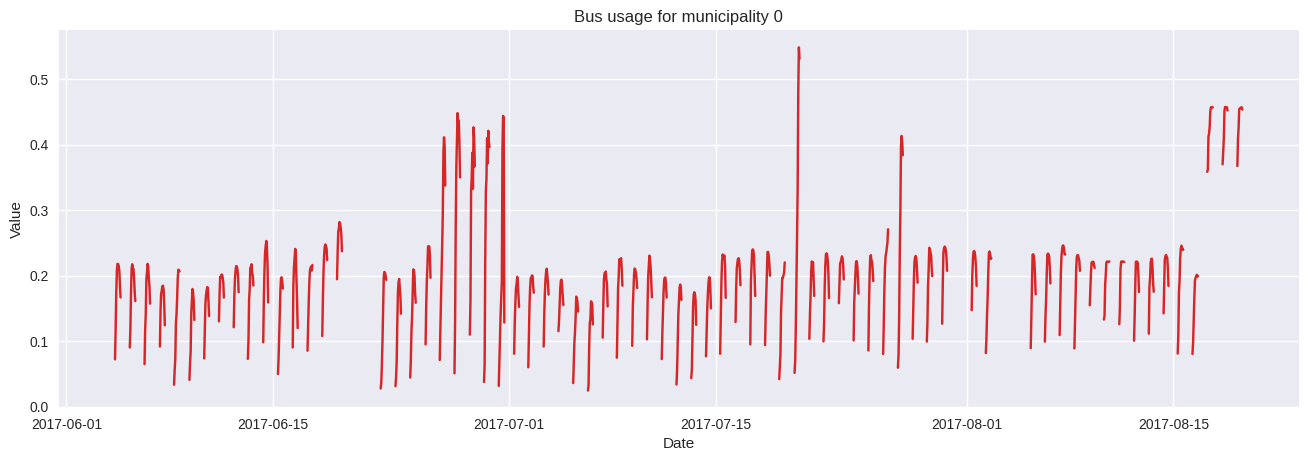

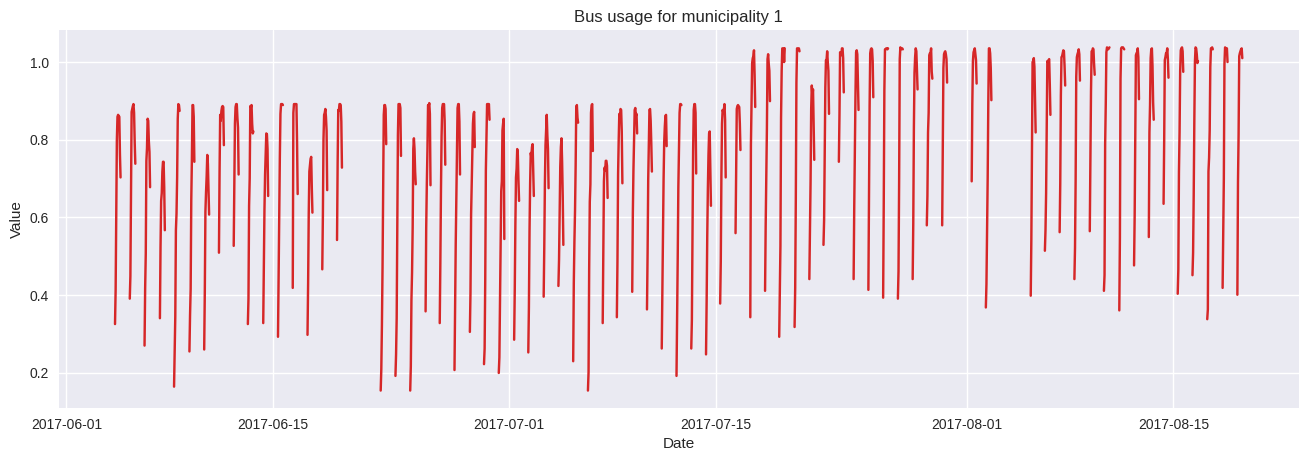

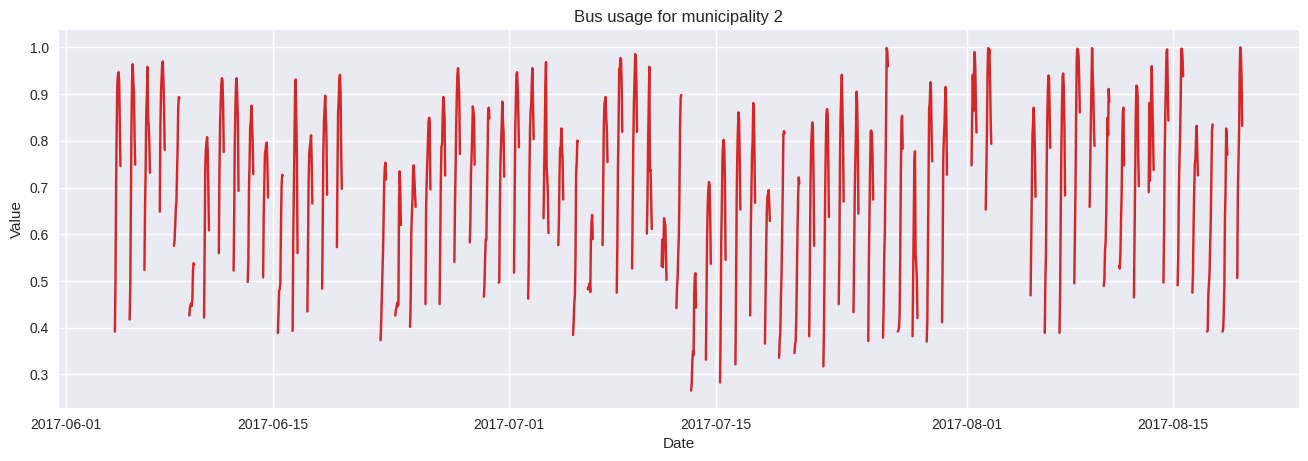

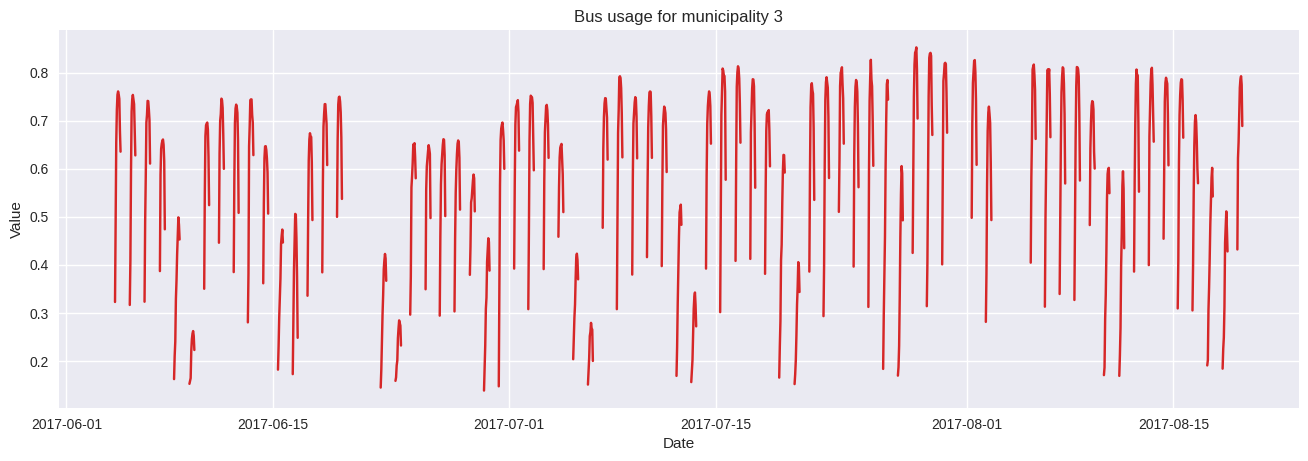

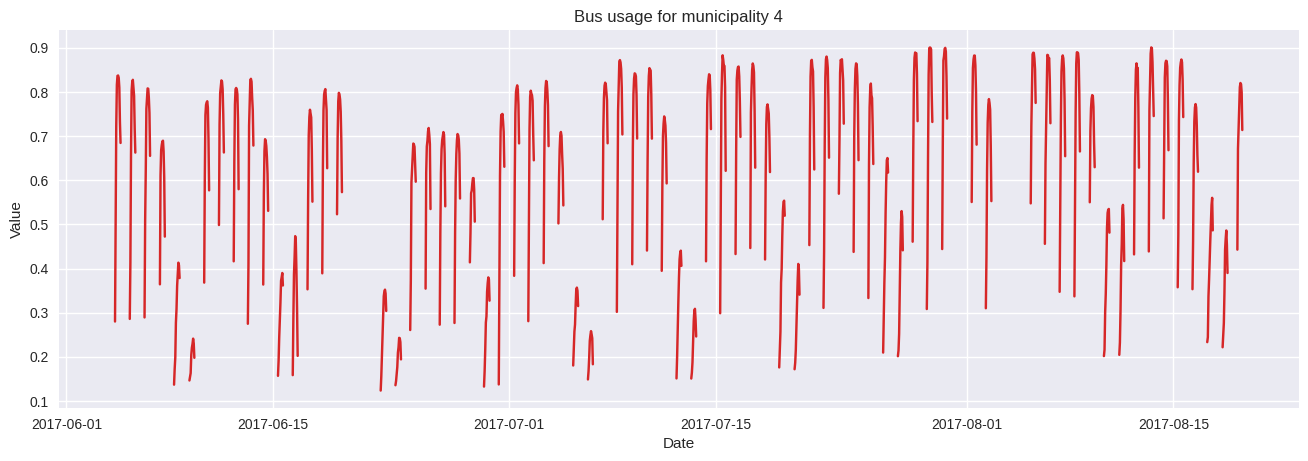

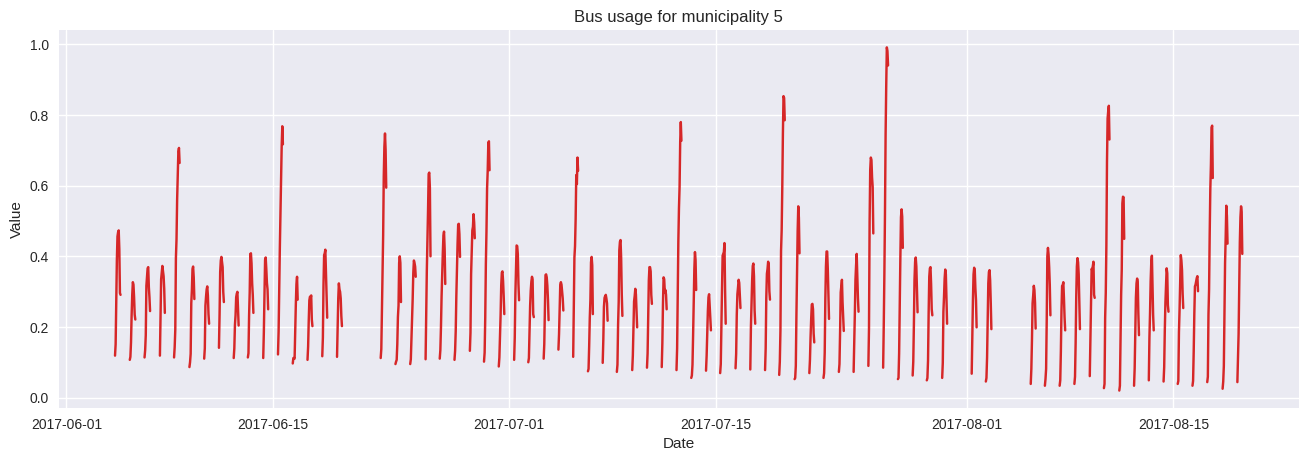

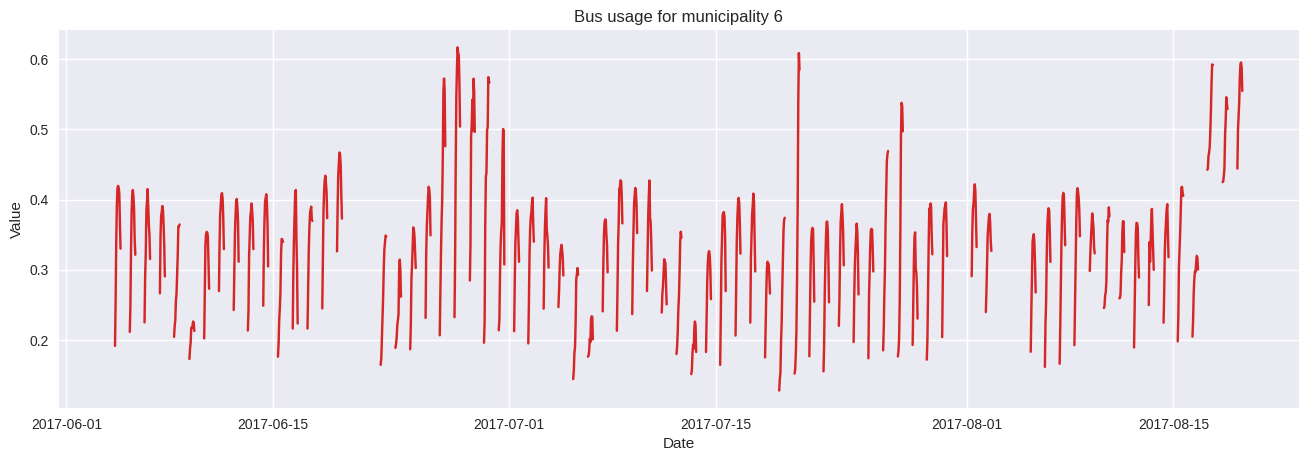

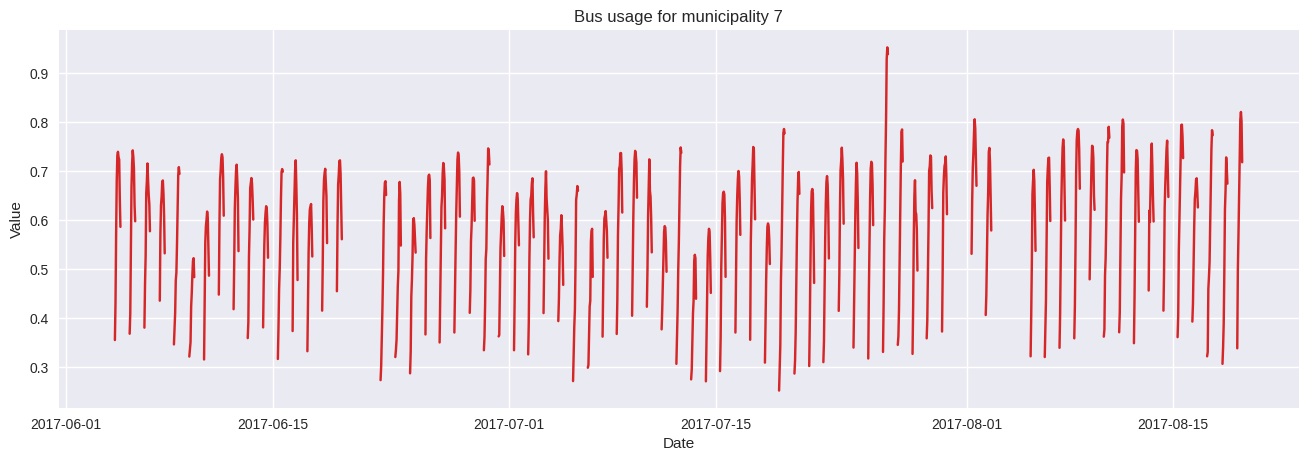

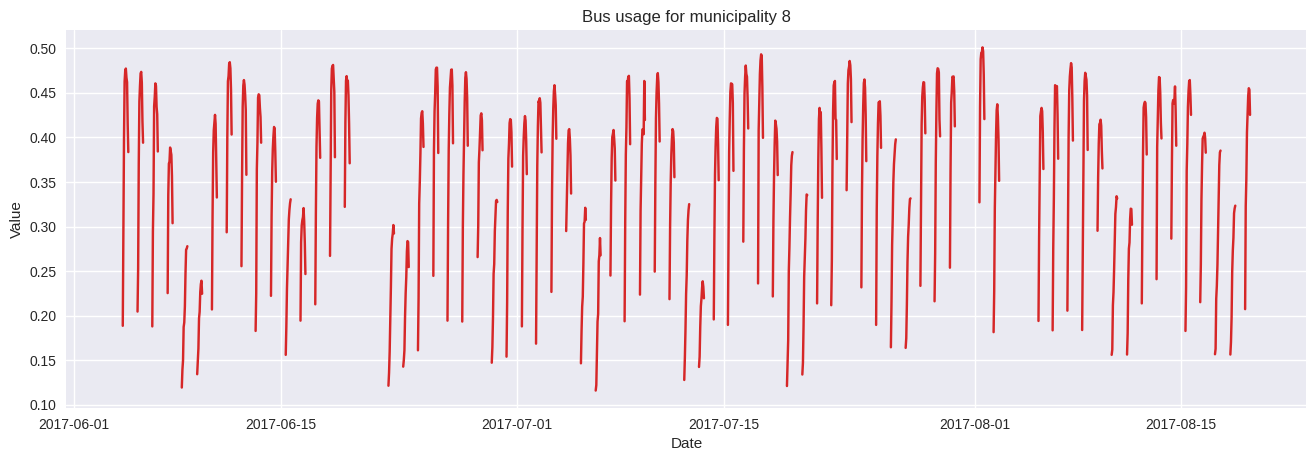

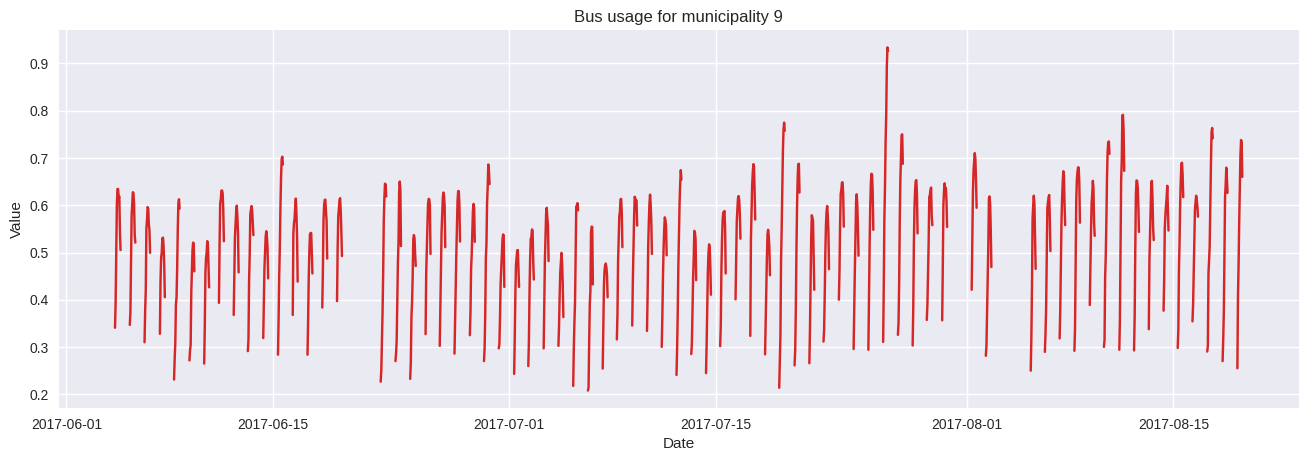

In [83]:
# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

index = 0
for d in data:
  plot_df(d, x=d.index, y=d.percentage_usage, title='Bus usage for municipality '+str(index))
  index = index + 1